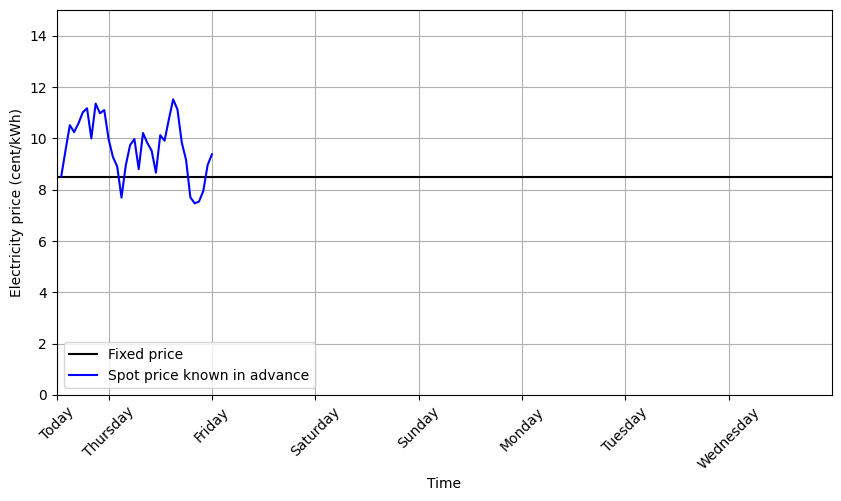

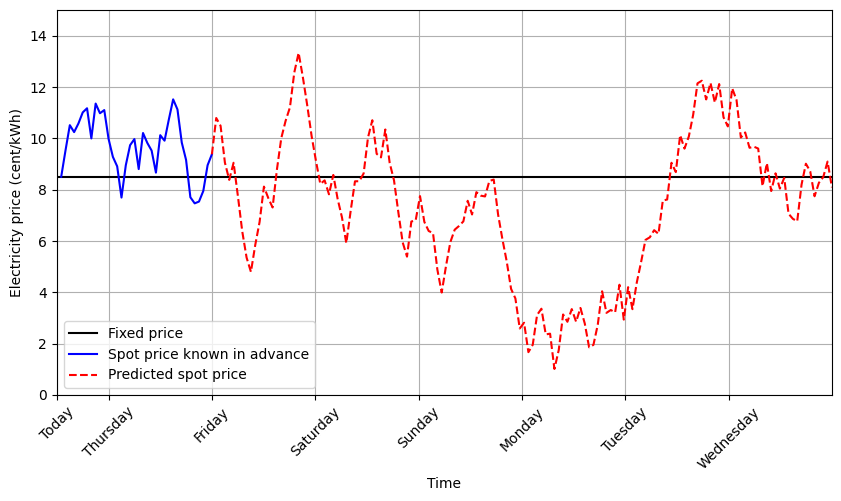

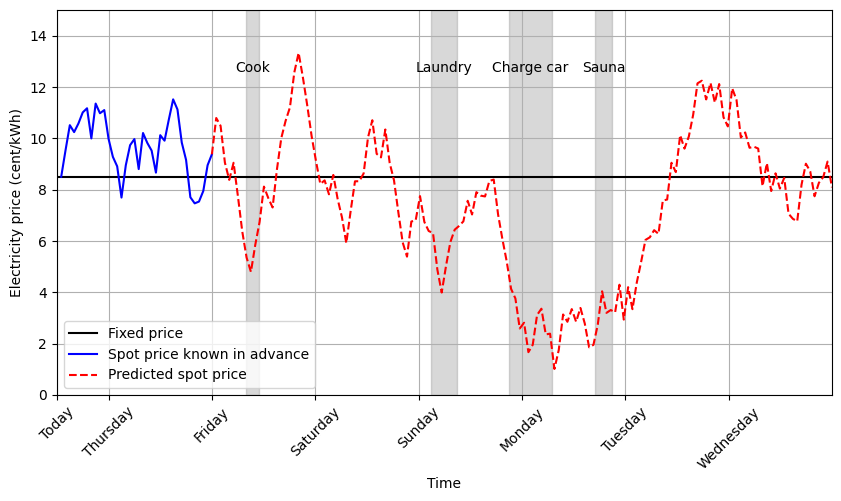

In [86]:
# Random walk to create the spotlight presentation figure
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(222)

N_SIM1 = 36
N_SIM2 = 6*24
N_SIM_TOT = N_SIM1 + N_SIM2

fixed_price = 8.5
fpa = np.ones(N_SIM_TOT) * fixed_price

sim_1 = np.zeros(N_SIM1)
sim_1[0] = 8.5 # Start from fixed price
sim_2 = np.zeros(N_SIM2)

step_prob = 0.5
for i in range(1, N_SIM1):
    step = np.random.rand()
    if step < step_prob:
        coef = -1
    else:
        coef = 1
    sim_1[i] = sim_1[i-1] + coef * np.random.rand() * 1.5

sim_2[0] = sim_1[len(sim_1)-1]
for j in range(1, N_SIM2):
    step = np.random.rand()
    if step < step_prob:
        coef = -1
    else:
        coef = 1
    sim_2[j] = sim_2[j-1] + coef * np.random.rand() * 1.5

def add_region_to_plot(x1, x2, label):
    plt.axvspan(x1, x2, color='gray', alpha=0.3)
    plt.text((x1 + x2) / 2, 13.0, label, color='black', ha='center', va='top', fontsize=10)#, bbox=dict(facecolor='white', alpha=0.5))

def plot_for_spotlight(include_prediction, add_example_plan, figure_name):
    plt.figure(figsize=(10,5))
    plt.plot(np.linspace(0, N_SIM_TOT, N_SIM_TOT), fpa, color='black', label='Fixed price')
    plt.plot(np.linspace(1, N_SIM1, N_SIM1), sim_1, color='blue', label='Spot price known in advance')

    if include_prediction:
        plt.plot(np.linspace(N_SIM1, N_SIM1+N_SIM2, N_SIM2), sim_2, color='red', linestyle='dashed', label='Predicted spot price')

    if add_example_plan:
        food_1 = 44
        food_2 = 47
        add_region_to_plot(food_1, food_2, 'Cook')
        laundry_1 = 87
        laundry_2 = 93
        add_region_to_plot(laundry_1, laundry_2, 'Laundry')
        charge_car_1 = 105
        charge_car_2 = 115
        add_region_to_plot(charge_car_1, charge_car_2, 'Charge car')
        sauna_1 = 125
        sauna_2 = 129
        add_region_to_plot(sauna_1, sauna_2, 'Sauna')

    plt.grid(True)
    plt.xlabel('Time')
    time_left_today = 12
    vals0 = np.linspace(1,6,6).tolist()
    vals0 = [(x * 24)+time_left_today for x in vals0]
    xvals = np.hstack(([0, time_left_today], vals0))
    plt.xticks(xvals, ['Today', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'], rotation=45)
    plt.ylabel('Electricity price (cent/kWh)')
    plt.ylim([0, 15])
    plt.xlim([0, N_SIM_TOT])
    plt.legend(loc='lower left')
    plt.savefig(figure_name, dpi=300, bbox_inches='tight')
    plt.show()

# Plot without prediction
plot_for_spotlight(False, False, 'basefig')

# Plot with prediction
plot_for_spotlight(True, False, 'figwithpred')

# Add examples of electricity usage planning
plot_for_spotlight(True, True, 'finalfig')
